In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving ex4x.dat to ex4x.dat


In [3]:
import io
x= np.genfromtxt(io.BytesIO(uploaded['ex4x.dat']))

In [4]:
uploaded = files.upload()
y= np.genfromtxt(io.BytesIO(uploaded['ex4y.dat']))

Saving ex4y.dat to ex4y.dat


In [5]:
print(x.shape)
print(y.shape)

(80, 2)
(80,)


In [6]:
y = y.reshape([1,x.shape[0]])

In [7]:
y.shape

(1, 80)

In [8]:
m = x.shape[0]
x = np.insert(x,0,np.ones(m),axis =1)
x.shape

(80, 3)

In [9]:
#writing sigmoid function
def sigmoid(x):
  h =  1/(1+ np.exp(-x))
  return h 

In [10]:
np.random.seed(2)
theta = np.random.rand(x.shape[1],1)*0.01
theta

array([[0.00435995],
       [0.00025926],
       [0.00549662]])

In [11]:
print(theta.T.shape)
print(x.T.shape)

(1, 3)
(3, 80)


iteration 0 Loss 0.30081381633265847
iteration 1 Loss 0.29871922637919957
iteration 2 Loss 0.2979772386037354
iteration 3 Loss 0.29754736932992837
iteration 4 Loss 0.29721103264847937
iteration 5 Loss 0.296906673909827
iteration 6 Loss 0.2966187467308231
iteration 7 Loss 0.296342834195452
iteration 8 Loss 0.2960775055771751
iteration 9 Loss 0.2958221036013137
iteration 10 Loss 0.2955761819320817
iteration 11 Loss 0.29533935977989806
iteration 12 Loss 0.29511128309213597
iteration 13 Loss 0.29489161473378767
iteration 14 Loss 0.2946800313393081
iteration 15 Loss 0.2944762223035829
iteration 16 Loss 0.29427988912675523
iteration 17 Loss 0.2940907449573219
iteration 18 Loss 0.29390851414541425
iteration 19 Loss 0.2937329318306094
iteration 20 Loss 0.29356374353549913
iteration 21 Loss 0.29340070477490104
iteration 22 Loss 0.2932435806750172
iteration 23 Loss 0.2930921456051438
iteration 24 Loss 0.2929461828206404
iteration 25 Loss 0.29280548411772445
iteration 26 Loss 0.2926698494997035
i

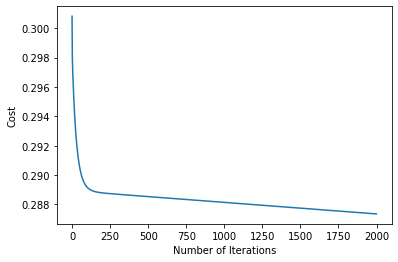

In [14]:

#random intialization 
np.random.seed(2)
theta = np.random.rand(x.shape[1],1)*0.01


alpha = 0.001
iter = 2000
theta = np.random.rand(x.shape[1],1)*0.01
cost_1 =np.zeros([1,iter])

 #looping for covergence
for i in range(iter):
  tmp = np.dot(theta.T,x.T)
  h1 = sigmoid(tmp)
  cost_1[0,i]=-(1/m)*np.sum((np.log10(h1)*y)+(np.log10(1-h1)*(1-y)))
  grad = (1/m)*np.sum(((h1-y).T*x),axis =0 , keepdims=True)   #broadcasting
  theta = theta - alpha*grad.T
  
  print("iteration",i,"Loss",cost_1[0,i])
  
#Plotting  
plt.plot(cost_1.T)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [16]:
print(theta)

[[-0.08100469]
 [ 0.04768646]
 [-0.02290339]]


In [19]:
#testing Phase 
tmp = np.dot(theta.T,x.T) 
h2 = sigmoid(tmp)
#defining decision boundary
h2 = np.where(h2 >= 0.5,1,h2)
h2 = np.where(h2 < 0.5,0,h2)
#computing error
error = np.sum(abs(y-h2))
error_rate = (error/m)*100
recognition_rate = 100-error_rate
print("error rate",error_rate,"%")
print("recognition rate",recognition_rate,"%")

error rate 38.75 %
recognition rate 61.25 %
